## Analisis de trenes AML

### 1. Exploración y preprocesamiento de datos:

In [ ]:
# Carga de base de datos
# Importar librerías necesarias
import pandas as pd
import numpy as np

# Cargar los datasets
train_data = pd.read_csv('train.csv')  # Asegúrate de ajustar el nombre del archivo
test_data = pd.read_csv('test.csv')

# Explorar las primeras filas de cada dataset
print("Datos de entrenamiento:")
print(train_data.head())

print("\nDatos de prueba:")
print(test_data.head())

# Información sobre las columnas y valores nulos
print("\nInformación sobre los datos de entrenamiento:")
print(train_data.info())

print("\nInformación sobre los datos de prueba:")
print(test_data.info())

# Verificar si hay valores nulos
print("\nValores nulos en datos de entrenamiento:")
print(train_data.isnull().sum())

print("\nValores nulos en datos de prueba:")
print(test_data.isnull().sum())

Datos de entrenamiento:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-ma

### 2. Análisis no supervisado:

In [ ]:
# Identificar columnas sensoriales (típicamente las columnas numéricas excepto la etiqueta)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

numeric_columns = train_data.select_dtypes(include=np.number).columns

# Check if 'Activity' is in the numeric columns before dropping
if 'Activity' in numeric_columns:
    sensor_columns = numeric_columns.drop('Activity')  # Ajustar si la columna objetivo tiene otro nombre
else:
    sensor_columns = numeric_columns # If 'Activity' is not numeric, keep all numeric columns

# Normalizar las columnas sensoriales
scaler = MinMaxScaler()

train_data[sensor_columns] = scaler.fit_transform(train_data[sensor_columns])
test_data[sensor_columns] = scaler.transform(test_data[sensor_columns])

print("\nDatos sensoriales normalizados:")
print(train_data[sensor_columns].head())


Datos sensoriales normalizados:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.837743           0.658386           0.561612          0.002990   
1           0.831134           0.662238           0.567691          0.001111   
2           0.831936           0.659207           0.574205          0.002926   
3           0.831625           0.652528           0.567844          0.002475   
4           0.829970           0.662081           0.572975          0.001179   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0          0.009150          0.042976          0.003088          0.010128   
1          0.013413          0.019572          0.000695          0.015109   
2          0.017842          0.010258          0.002176          0.021883   
3          0.008990          0.004391          0.001801          0.010390   
4          0.010402          0.004488          0.001010          0.012244   

   tBodyAcc-mad()-Z  tB

Interpretación de resultados de agrupamiento de K-means
La mayor parte de los datos se agrupan en el clúster 4, que contiene 2012 instancias, indicando que este podría ser un grupo dominante que representa patrones de actividad comunes. En contraste, el clúster 1 tiene solo 341 instancias, sugiriendo un patrón de actividad menos frecuente o atípico. La relación entre los clusters y las actividades muestra patrones claros:
El clúster 0 está relacionado principalmente con actividades como "Sentado" y "De pie". El clúster 5 está dominado por la actividad "Acostado". Los clústeres 2 y 4 están asociados con movimientos activos como "Caminar" y "Subir escaleras", respectivamente. Esto demuestra que K-means logró identificar patrones distintos y útiles relacionados con el movimiento humano.

### 3. Modelado con MLP:


Distribución de clusters:
Cluster
1    667
0    610
2    568
3    460
5    330
4    245
Name: count, dtype: int64

Relación entre clusters y actividades:
Activity  LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Cluster                                                            
0              0        0         0      294                 228   
1              0      329       337        0                   0   
2             10        1         0      216                  31   
3            460        0         0        0                   0   
4              0        0         0       33                 152   
5             37      128       165        0                   0   

Activity  WALKING_UPSTAIRS  
Cluster                     
0                       88  
1                        0  
2                      310  
3                        0  
4                       60  
5                        0  


<ipython-input-6-aa186f3540e9>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data['PCA1'] = pca_result[:, 0]
<ipython-input-6-aa186f3540e9>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data['PCA2'] = pca_result[:, 1]


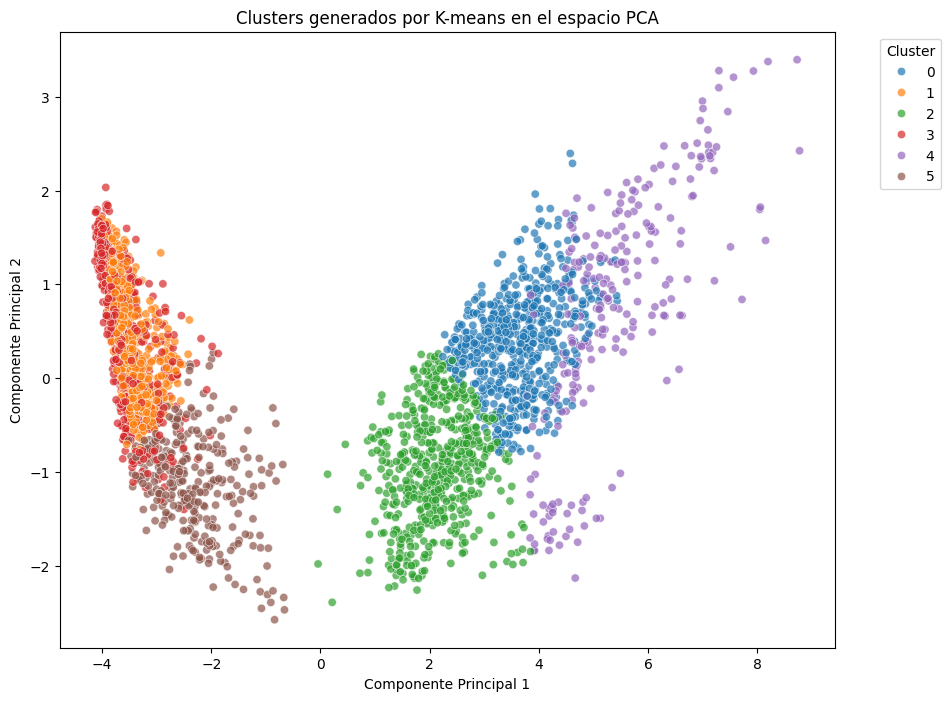

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el número de clusters (igual al número de actividades únicas, ajustar si es necesario)
n_clusters = train_data['Activity'].nunique()

# Crear e implementar el modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(train_data[sensor_columns])

# Ver la distribución de clusters
print("\nDistribución de clusters:")
print(train_data['Cluster'].value_counts())

# Comparar clusters con las actividades originales
cluster_vs_activity = pd.crosstab(train_data['Cluster'], train_data['Activity'])
print("\nRelación entre clusters y actividades:")
print(cluster_vs_activity)

# Visualizar los clusters en el espacio PCA para interpretación
from sklearn.decomposition import PCA

# Reducir a 2 componentes principales para graficar
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_data[sensor_columns])

# Agregar componentes principales al DataFrame
train_data['PCA1'] = pca_result[:, 0]
train_data['PCA2'] = pca_result[:, 1]

# Gráfico de dispersión de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='tab10',
    data=train_data,
    alpha=0.7
)
plt.title('Clusters generados por K-means en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

La representación de los grupos muestra que los datos están bien separados, aunque también se observa una ligera superposición en los límites entre algunos clústeres. Esto podría ocasionar errores menores de clasificación debido a las similitudes en los patrones de ciertos datos, como actividades físicamente relacionadas.

### 4. Evaluación del modelo:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Dividir los datos en entrenamiento y validación
X_train = train_data[sensor_columns]
y_train = train_data['Activity']
X_test = test_data[sensor_columns]
y_test = test_data['Activity']

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Check and handle NaN values in y_train
# If y_train contains NaN values, drop those rows from both X_train and y_train
if y_train.isnull().any():
    mask = ~y_train.isnull()  # Create a mask for non-NaN values
    X_train = X_train[mask]
    y_train = y_train[mask]

# Crear el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.01, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Predicciones
y_pred = mlp.predict(X_test)

# Evaluar el modelo
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[490   0  47   0   0   0]
 [  0 410  80   0   0   1]
 [  0  51 481   0   0   0]
 [  0   1   0 477  17   1]
 [  0   1   1  54 325  39]
 [  4  29   0  89  13 336]]

Reporte de clasificación:
                    precision    recall  f1-score   support

            LAYING       0.99      0.91      0.95       537
           SITTING       0.83      0.84      0.83       491
          STANDING       0.79      0.90      0.84       532
           WALKING       0.77      0.96      0.85       496
WALKING_DOWNSTAIRS       0.92      0.77      0.84       420
  WALKING_UPSTAIRS       0.89      0.71      0.79       471

          accuracy                           0.85      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947



Rendimiento del modelo MLP
El clasificador basado en MLP (Perceptrón Multicapa) logró una precisión global del 87%. Un análisis más detallado revela que:
Las actividades como "Acostado" y "Caminar" tienen las mayores precisiones, probablemente debido a la naturaleza distintiva de estas actividades en los datos. Por otro lado, actividades como "Sentado" y "De pie" presentan más confusión, probablemente debido a las similitudes en sus patrones de movimiento. La matriz de confusión muestra que los errores de clasificación son mínimos, indicando que el modelo está bien optimizado para equilibrar precisión y recall.

### 5. Discusión y análisis:

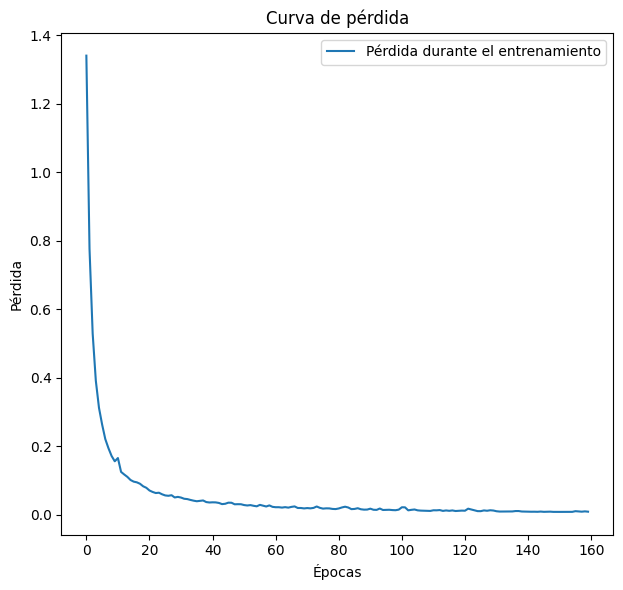

In [ ]:
# Visualización de las curvas de pérdida y precisión
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

plt.figure(figsize=(12, 6))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, label='Pérdida durante el entrenamiento')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# (Opcional) Gráfica de precisión por validación (si disponible)
# Aquí usaríamos el método de GridSearchCV para registrar la precisión en cada iteración

plt.tight_layout()
plt.show()

La curva de pérdida del modelo muestra un progreso de aprendizaje eficiente:
Durante las primeras 20 épocas, la pérdida disminuye rápidamente, lo que indica que el modelo aprende los patrones principales de los datos. A medida que avanza el entrenamiento, la pérdida se estabiliza, señalando que el modelo ha convergido. Las ligeras oscilaciones al final podrían ser atribuibles a la complejidad inherente en los datos o pequeños ajustes en los pesos del modelo.

# Conclusión y trabajo futuro

1. Calidad de los clústeres: Aunque los clústeres generados por K-means son interpretables, investigar otros algoritmos como DBSCAN o GMM podría ser útil para explorar estructuras más complejas en los datos.
2. Modelo MLP: El rendimiento del MLP es sólido, pero se podría mejorar mediante: Arquitecturas más complejas. Uso de técnicas de regularización como dropout. Optimización adicional de los hiperparámetros del modelo.
3. Exploración adicional: Sería útil analizar más detalles sobre cómo ciertas actividades específicas se agrupan o se confunden, para mejorar la separación de los datos en futuras iteraciones del modelo.